# Пример, Kanji, критерий 1

Линия по производству пудры должна обеспечивать средний вес пудры в
упаковке 4 грамма, заявленное стандартное отклонение — 1 грамм.
В ходе инспекции выбрано 9 упаковок, средний вес продукта в них составляет
4.6 грамма.

$H_0$: средний вес пудры в упаковке соответствует норме.

$H_1$: средний вес пудры в упаковке не соответствует норме.

```p=0.0719```

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

Проверим критерий "вручную":

$Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}.$

$p(Z) = 2 \bigl(1-F(|Z|)\bigr).$

In [3]:
mu = 4
std = 1
n = 9
mean = 4.6

In [5]:
Z = (mean - mu)/std * n**0.5
Z

1.799999999999999

In [7]:
def F(Z):
    return st.distributions.norm.cdf(Z)
p = 2*(1 - F(Z))
p

0.07186063822585176

Просэмплируем похожую выборку и проверим критерий с использованием библиотеки ```statsmodels```

In [8]:
rs = np.random.RandomState(5)
X = rs.randn(n) * std + 4.3
np.mean(X), np.std(X)

(4.596429057120655, 1.0118035250351838)

In [9]:
from statsmodels.stats.weightstats import ztest
ztest(X, value=mu)

(1.667276384600652, 0.0954594601765454)

# Кобзарь, задача 227

Нормируемый уровень дефектных изделий в партии $p_0 = 0.05$. Среди 20 изделий
партии проверка обнаружила 2 дефектных.

$H_0$ : доля дефектных изделий в партии не выше нормы.

$H_1$ : доля дефектных изделий в партии выше нормы.

Для биномиального критерия ```p=0.2642```.

Проверим критерий "вручную":

$T = \sum X_i$

$p(T) = 1 - F(T)$ 

In [10]:
T = 2
n = 20
p = 0.05

In [12]:
1 - st.binom(n , p).cdf(T)

0.07548367378849652

Проверим критерий с использованием библиотеки ```scipy```.

In [17]:
st.binom_test(T, n, p, alternative='greater')

0.26416047505615026

```statsmodels```

In [18]:
from statsmodels.stats.proportion import binom_test

In [19]:
binom_test(T, n, p, alternative='larger')

0.26416047505615026

# Антиконсервативность интервалов доверия

Построим график попадания параметра распределения Бернулли в 95%-доверительный интервал.

In [20]:
from statsmodels.stats.proportion import proportion_confint
N_exp = 100
n = 40
p_array =  np.arange(0.05,0.95,0.01)

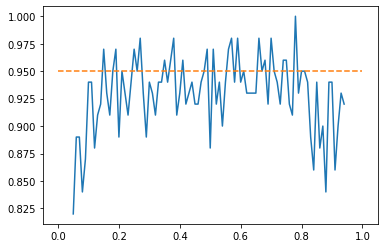

In [21]:
plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)
        left, right = (proportion_confint(X, n))
        if left <= p <= right:
            success += 1.0
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

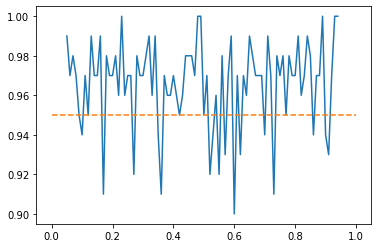

In [22]:
plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)        
        left, right = (proportion_confint(X, n, method='beta'))
        if left <= p <= right:
            success += 1
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

# Бонд, продолжение

Пусть Бонд выбрал взболтанный мартини в 12 случаев из 16.

Требуется:
1. Проверить гипотезу о равнозначности мартини методами ```binom_test```, ```proportions_chisquare```, 
```proportions_ztest```.


2. Провести симуляцию, построить зависимость pow от истинного значения p для выборок мощностью 5, 10, 20, 100, 1000 для разных методов.

3. Провести симуляцию, построить зависимость ошибки первого рода от проверяемого значения $p_0$ при истинном значении p=0.5 для разных методов и мощностей выборки.

In [23]:
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare

In [26]:
T = 12
n = 16
p = 0.5

In [28]:
st.binom_test(T, n , 0.5), proportions_chisquare(T, n , 0.5), proportions_ztest(T, n , 0.5)

(0.076812744140625,
 (4.0, 0.04550026389635857, (array([[12,  4]]), array([[8., 8.]]))),
 (2.3094010767585034, 0.020921335337794014))

In [45]:
np.random.binomial(1, 0.5)

1

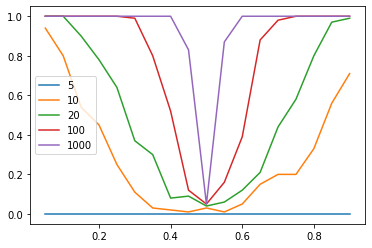

In [48]:

ns = [5, 10, 20, 100, 1000]
for i in ns:
    X = []
    Y = []
    for p in np.arange(0.05  , 0.95 , 0.05):
        sec = 0
        for _ in range(100):
            x_ = np.random.binomial(i , p)
            if binom_test(x_ , i , 0.5 ) <= 0.05:
                sec += 1
        X.append(p)
        Y.append(sec/100)
    plt.plot(X , Y , label = str(i))
plt.legend(loc = 'best')
    

In [51]:
np.random.binomial(10 , 0.5)

5

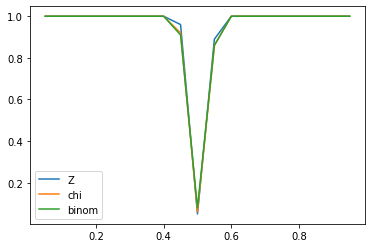

In [53]:

def ztest(x_):
    return proportions_ztest(x_ , n , 0.5)[1] <= 0.05

def binom(x_):
    return binom_test(x_ , n , 0.5)<= 0.05

def chi(x_):
    return proportions_chisquare(x_ , n , 0.5)[1] <= 0.05

n = 1000

for label , method in [('Z' ,ztest ) , ('chi' , chi) , ('binom' , binom)]:
    X = []
    Y = []
    for p in np.arange(0.05,1,0.05):
        sec = 0
        for _ in range(100):
            x_ = np.random.binomial(n , p)
            if method(x_):
                sec += 1
        X.append(p)
        Y.append(sec/100)
    plt.plot(X , Y , label = label)
plt.legend(loc = 'best')

C:\Apps\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:671: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


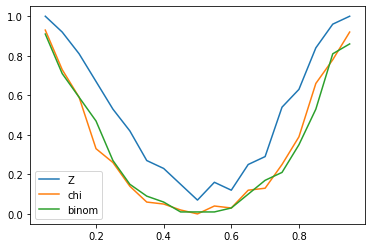

In [54]:
n = 10
for label , method in [('Z' ,ztest ) , ('chi' , chi) , ('binom' , binom)]:
    X = []
    Y = []
    for p in np.arange(0.05,1,0.05):
        sec = 0
        for _ in range(100):
            x_ = np.random.binomial(n , p)
            if method(x_):
                sec += 1
        X.append(p)
        Y.append(sec/100)
    plt.plot(X , Y , label = label)
plt.legend(loc = 'best')